In [1]:
!pip install langdetect

In [2]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt 
from langdetect import detect

In [3]:
with open("Results.pkl","rb") as f:
    data = pickle.load(f)

In [4]:
df = pd.DataFrame(data)

In [5]:
df['Lang'] = df['text'].apply(lambda x: detect(x))

In [6]:
df = df[df["Lang"] == 'en']

In [7]:
df.reset_index(inplace=True,drop=True)

In [8]:
df

,id,user_id,user_name,screen_username,followers,follows,location,retweets,likes,time_creation,names,replies,text,ekman,plutchik,poms,Lang
0,1345484212342829060,2345198082,Québec.AI,Quebec_AI,156308,6,"Québec, Canada",0,0,2021-01-02 21:36:48,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,"AI DEBATE 2\n\n""It takes a village to raise an...","{'Anger': 0.18170805, 'Disgust': 0.009929685, ...","{'Anger': 0.0031134335, 'Disgust': 0.000113043...","{'Anger': 1.6765523e-05, 'Depression': 4.79730...",en
1,1345484101361532929,2345198082,Québec.AI,Quebec_AI,156308,6,"Québec, Canada",0,0,2021-01-02 21:36:22,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,AI DEBATE 3\n\nBy: https://t.co/VaMGbOjQ11\n\n...,"{'Anger': 0.004034789, 'Disgust': 0.012270186,...","{'Anger': 8.768835e-05, 'Disgust': 0.000169608...","{'Anger': 4.7939427e-08, 'Depression': 2.90681...",en
2,1345484041655619586,2345198082,Québec.AI,Quebec_AI,156308,6,"Québec, Canada",0,0,2021-01-02 21:36:08,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,"""Leading computer scientists debate the next s...","{'Anger': 6.296762e-05, 'Disgust': 1.1265375e-...","{'Anger': 8.842684e-05, 'Disgust': 1.9328957e-...","{'Anger': 0.00017228695, 'Depression': 0.99953...",en
3,1345476217470910469,919860212,MONTREAL.AI,Montreal_AI,173086,0,"Montréal, Québec",0,0,2021-01-02 21:05:02,"[{'screen_name': 'future_of_AI', 'name': 'Futu...",0,‘The Debate of the Next Decade’ — AI Debate 2 ...,"{'Anger': 0.015929976, 'Disgust': 0.0014051175...","{'Anger': 0.011237565, 'Disgust': 0.0008610552...","{'Anger': 0.08627573, 'Depression': 0.3605885,...",en
4,1345465866708606976,1964009738,BrainBlender🤔🌐,BrainBlenderTec,2594,1499,None,0,0,2021-01-02 20:23:54,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,AI DEBATE 3\n\nBy: https://t.co/VaMGbOjQ11\n\n...,"{'Anger': 0.004034789, 'Disgust': 0.012270186,...","{'Anger': 8.768835e-05, 'Disgust': 0.000169608...","{'Anger': 4.7939427e-08, 'Depression': 2.90681...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,1338334044652777474,18765967,florian semle,floriansemle,9304,2850,Munich,0,0,2020-12-14 04:04:35,"[{'screen_name': 'andi_staub', 'name': 'Andrea...",0,A Curious Theory About the Consciousness Debat...,"{'Anger': 0.0076080277, 'Disgust': 0.002958448...","{'Anger': 0.0053252345, 'Disgust': 0.002136733...","{'Anger': 0.283853, 'Depression': 0.26479363, ...",en
3682,1338316117719310337,808634232205549568,Team ZapERP,zaperpofficial,45,73,"Newark, DE",0,0,2020-12-14 02:53:21,[],0,"Today, we debate the use of Excel as an invent...","{'Anger': 0.006016986, 'Disgust': 0.0001149568...","{'Anger': 0.006871094, 'Disgust': 8.842454e-05...","{'Anger': 0.079801284, 'Depression': 0.8427092...",en
3683,1338309981515382784,19989030,Luis Lamb,luislamb,1839,1730,"Porto Alegre, Brazil",0,0,2020-12-14 02:28:58,"[{'screen_name': 'AvilaGarcez', 'name': 'Artur...",0,And very much related to Neurosymbolic AI: the...,"{'Anger': 0.007876085, 'Disgust': 0.0002004790...","{'Anger': 0.0015957936, 'Disgust': 5.6895133e-...","{'Anger': 0.55815536, 'Depression': 0.38341668...",en
3684,1338309832995004416,19989030,Luis Lamb,luislamb,1839,1730,"Porto Alegre, Brazil",0,0,2020-12-14 02:28:23,"[{'screen_name': 'luislamb', 'name': 'Luis Lam...",0,NeurIPS panel on human intelligence vs AI: w/@...,"{'Anger': 0.0072368993, 'Disgust': 5.985207e-0...","{'Anger': 0.0039856, 'Disgust': 3.1585707e-05,...","{'Anger': 0.07640031, 'Depression': 0.8762785,...",en


In [9]:
dfekman = df["ekman"].apply(pd.Series)

In [10]:
dfekman.columns = ["ekman_"+x for x in dfekman.columns]

In [11]:
dfplutchik = df["plutchik"].apply(pd.Series)
dfplutchik.columns = ["plutchik_"+x for x in dfplutchik.columns]

In [12]:
dfpoms = df["poms"].apply(pd.Series)
dfpoms.columns = ["poms_"+x for x in dfpoms.columns]

In [13]:
df_new = pd.concat([df, dfekman], axis = 1)
df_new = pd.concat([df_new, dfplutchik], axis = 1)
df_new = pd.concat([df_new, dfpoms], axis = 1)


In [14]:
df_new.head()

,id,user_id,user_name,screen_username,followers,follows,location,retweets,likes,time_creation,names,replies,text,ekman,plutchik,poms,Lang,ekman_Anger,ekman_Disgust,ekman_Fear,ekman_Joy,ekman_Sadness,ekman_Surprise,plutchik_Anger,plutchik_Disgust,plutchik_Fear,plutchik_Joy,plutchik_Sadness,plutchik_Surprise,plutchik_Trust,plutchik_Anticipation,poms_Anger,poms_Depression,poms_Fatigue,poms_Vigour,poms_Tension,poms_Confusion
0,1345484212342829060,2345198082,Québec.AI,Quebec_AI,156308,6,"Québec, Canada",0,0,2021-01-02 21:36:48,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,"AI DEBATE 2\n\n""It takes a village to raise an...","{'Anger': 0.18170805, 'Disgust': 0.009929685, ...","{'Anger': 0.0031134335, 'Disgust': 0.000113043...","{'Anger': 1.6765523e-05, 'Depression': 4.79730...",en,0.181708,0.009930,0.292231,0.226576,0.002987,0.286568,0.003113,0.000113,0.003762,0.002110,0.000028,0.005000,0.985134,0.000739,1.676552e-05,0.000005,0.000011,0.999543,0.000403,2.274239e-05
1,1345484101361532929,2345198082,Québec.AI,Quebec_AI,156308,6,"Québec, Canada",0,0,2021-01-02 21:36:22,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,AI DEBATE 3\n\nBy: https://t.co/VaMGbOjQ11\n\n...,"{'Anger': 0.004034789, 'Disgust': 0.012270186,...","{'Anger': 8.768835e-05, 'Disgust': 0.000169608...","{'Anger': 4.7939427e-08, 'Depression': 2.90681...",en,0.004035,0.012270,0.408956,0.199015,0.117820,0.257903,0.000088,0.000170,0.007450,0.003164,0.002563,0.003419,0.028445,0.954701,4.793943e-08,0.000029,0.583892,0.415885,0.000193,2.151424e-07
2,1345484041655619586,2345198082,Québec.AI,Quebec_AI,156308,6,"Québec, Canada",0,0,2021-01-02 21:36:08,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,"""Leading computer scientists debate the next s...","{'Anger': 6.296762e-05, 'Disgust': 1.1265375e-...","{'Anger': 8.842684e-05, 'Disgust': 1.9328957e-...","{'Anger': 0.00017228695, 'Depression': 0.99953...",en,0.000063,0.000001,0.003538,0.996074,0.000119,0.000206,0.000088,0.000002,0.004995,0.986106,0.000192,0.000334,0.008269,0.000013,1.722869e-04,0.999539,0.000018,0.000010,0.000250,1.096110e-05
3,1345476217470910469,919860212,MONTREAL.AI,Montreal_AI,173086,0,"Montréal, Québec",0,0,2021-01-02 21:05:02,"[{'screen_name': 'future_of_AI', 'name': 'Futu...",0,‘The Debate of the Next Decade’ — AI Debate 2 ...,"{'Anger': 0.015929976, 'Disgust': 0.0014051175...","{'Anger': 0.011237565, 'Disgust': 0.0008610552...","{'Anger': 0.08627573, 'Depression': 0.3605885,...",en,0.015930,0.001405,0.174093,0.603618,0.013279,0.191675,0.011238,0.000861,0.129175,0.399109,0.009126,0.138804,0.286126,0.025562,8.627573e-02,0.360588,0.013255,0.150220,0.237632,1.520291e-01
4,1345465866708606976,1964009738,BrainBlender🤔🌐,BrainBlenderTec,2594,1499,None,0,0,2021-01-02 20:23:54,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,AI DEBATE 3\n\nBy: https://t.co/VaMGbOjQ11\n\n...,"{'Anger': 0.004034789, 'Disgust': 0.012270186,...","{'Anger': 8.768835e-05, 'Disgust': 0.000169608...","{'Anger': 4.7939427e-08, 'Depression': 2.90681...",en,0.004035,0.012270,0.408956,0.199015,0.117820,0.257903,0.000088,0.000170,0.007450,0.003164,0.002563,0.003419,0.028445,0.954701,4.793943e-08,0.000029,0.583892,0.415885,0.000193,2.151424e-07


In [15]:

# standardize the time
df_new['date'] = pd.to_datetime(df_new['time_creation'], format='%Y-%m-%d %H:%M:%S').dt.date

In [16]:
df_new = df_new.sort_values(by='date')

In [17]:
df_new.head()

,id,user_id,user_name,screen_username,followers,follows,location,retweets,likes,time_creation,names,replies,text,ekman,plutchik,poms,Lang,ekman_Anger,ekman_Disgust,ekman_Fear,ekman_Joy,ekman_Sadness,ekman_Surprise,plutchik_Anger,plutchik_Disgust,plutchik_Fear,plutchik_Joy,plutchik_Sadness,plutchik_Surprise,plutchik_Trust,plutchik_Anticipation,poms_Anger,poms_Depression,poms_Fatigue,poms_Vigour,poms_Tension,poms_Confusion,date
3685,1338300230068998149,298704683,Andreas Staub,andi_staub,60596,7950,None,0,0,2020-12-14 01:50:13,"[{'screen_name': 'andi_staub', 'name': 'Andrea...",0,A Curious Theory About the Consciousness Debat...,"{'Anger': 0.0076080277, 'Disgust': 0.002958448...","{'Anger': 0.0053252345, 'Disgust': 0.002136733...","{'Anger': 0.283853, 'Depression': 0.26479363, ...",en,0.007608,0.002958,0.113809,0.839577,0.010787,0.025261,0.005325,0.002137,0.061542,0.423633,0.005304,0.014904,0.477901,0.009254,0.283853,0.264794,0.009453,2.694865e-03,0.004659,0.434547,2020-12-14
3579,1338506229853851653,2801765762,Ursula Pachl,PachlUpa,1159,665,Brussels,0,0,2020-12-14 15:28:48,"[{'screen_name': 'EURightsAgency', 'name': 'EU...",0,"💬#AI is changing the rules of the game, says @...","{'Anger': 0.019598236, 'Disgust': 0.0009981814...","{'Anger': 0.005041501, 'Disgust': 0.0002880619...","{'Anger': 0.28206113, 'Depression': 0.20543215...",en,0.019598,0.000998,0.424038,0.546927,0.002137,0.006302,0.005042,0.000288,0.118148,0.087263,0.000537,0.001502,0.785134,0.002086,0.282061,0.205432,0.167059,9.447170e-06,0.112451,0.232987,2020-12-14
3578,1338506543495516163,3547052175,Observatori Igualtat CAT #Equitat_Diversitat 🌈,ObservatoriCat,697,587,"Cataluña, España",0,0,2020-12-14 15:30:02,"[{'screen_name': 'EURightsAgency', 'name': 'EU...",0,EU horizontal #AI legal framework plans to tak...,"{'Anger': 0.022700055, 'Disgust': 0.0006978462...","{'Anger': 0.013338711, 'Disgust': 0.0002819609...","{'Anger': 0.19451053, 'Depression': 0.71580625...",en,0.022700,0.000698,0.644997,0.207709,0.054671,0.069226,0.013339,0.000282,0.457887,0.065585,0.025641,0.038991,0.203457,0.194819,0.194511,0.715806,0.000004,1.322643e-11,0.002081,0.087598,2020-12-14
3577,1338506566333566985,3547052175,Observatori Igualtat CAT #Equitat_Diversitat 🌈,ObservatoriCat,697,587,"Cataluña, España",0,0,2020-12-14 15:30:08,"[{'screen_name': 'EURightsAgency', 'name': 'EU...",0,"💬#AI is changing the rules of the game, says @...","{'Anger': 0.019598236, 'Disgust': 0.0009981814...","{'Anger': 0.005041501, 'Disgust': 0.0002880619...","{'Anger': 0.28206113, 'Depression': 0.20543215...",en,0.019598,0.000998,0.424038,0.546927,0.002137,0.006302,0.005042,0.000288,0.118148,0.087263,0.000537,0.001502,0.785134,0.002086,0.282061,0.205432,0.167059,9.447170e-06,0.112451,0.232987,2020-12-14
3576,1338506744142688257,3059346502,Antidiskriminierung,ADS_Bund,9251,791,Berlin,0,0,2020-12-14 15:30:50,"[{'screen_name': 'EURightsAgency', 'name': 'EU...",0,💬There are difficulties getting the data to pr...,"{'Anger': 0.021556566, 'Disgust': 0.0011781855...","{'Anger': 0.016824106, 'Disgust': 0.000603887,...","{'Anger': 0.18242034, 'Depression': 0.7605764,...",en,0.021557,0.001178,0.475333,0.460483,0.034263,0.007186,0.016824,0.000604,0.361205,0.183501,0.018487,0.004083,0.411204,0.004093,0.182420,0.760576,0.000121,1.038316e-09,0.000449,0.056434,2020-12-14


Ekman

            ekman_Anger  ekman_Disgust  ...  ekman_Sadness  ekman_Surprise
date                                    ...                               
2020-12-14    20.795757       6.405324  ...       7.181743       42.947586
2020-12-15    53.681124      21.843493  ...      48.044345       33.218401
2020-12-16    14.588508       1.307304  ...       3.836222       15.370340
2020-12-17    30.551752      38.554582  ...       9.457491        8.213007
2020-12-18    24.048332       9.489604  ...      16.112545       69.650346
2020-12-19     5.719109       7.221540  ...       4.625120       19.369748
2020-12-20     8.770355       1.931572  ...       5.324547       51.711710
2020-12-21     5.927559       2.027445  ...       5.879088       45.310466
2020-12-22     6.839075       3.073295  ...       1.962906       18.061479
2020-12-23   138.733489      21.010185  ...     111.105042      330.741062
2020-12-24   119.345658      46.033033  ...     131.906334      364.453199
2020-12-25    14.883500  

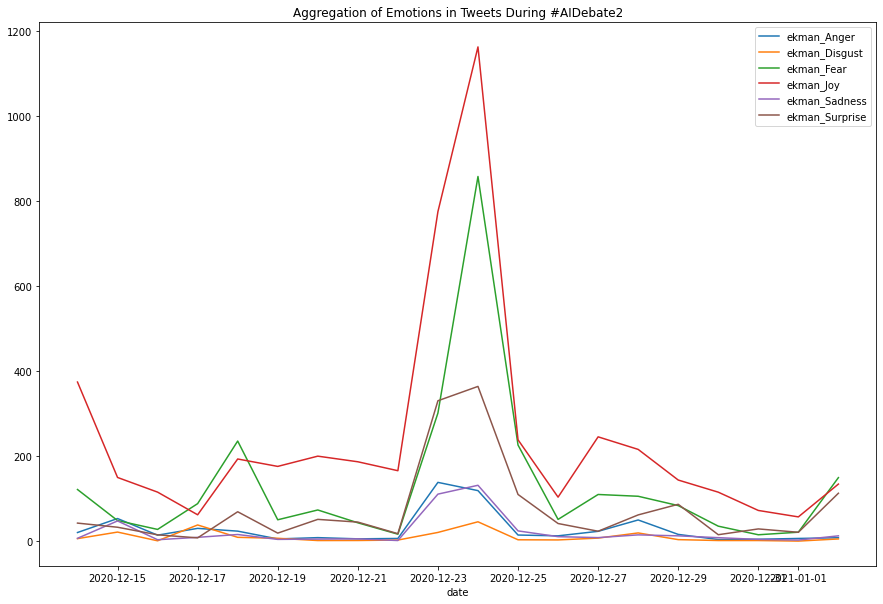

In [18]:
df_temp = df_new.copy()
df_temp[['ekman_Anger', 'ekman_Disgust', 'ekman_Fear', 'ekman_Joy', 'ekman_Sadness', 'ekman_Surprise']] = df_new[['ekman_Anger', 'ekman_Disgust', 'ekman_Fear', 'ekman_Joy', 'ekman_Sadness', 'ekman_Surprise']].multiply(df_temp['likes']+1, axis = 'index')
df2 = df_temp[['date','ekman_Anger',
 'ekman_Disgust',
 'ekman_Fear',
 'ekman_Joy',
 'ekman_Sadness',
 'ekman_Surprise']]
df2.set_index('date')

df3 = df2.groupby(df2['date']).sum()

print(df3)


fig = df3.plot(y=['ekman_Anger',
 'ekman_Disgust',
 'ekman_Fear',
 'ekman_Joy',
 'ekman_Sadness',
 'ekman_Surprise'], figsize=(15,10), 
         title='Aggregation of Emotions in Tweets During #AIDebate2').get_figure()
fig.savefig('EKMAN.png')

Plutchik

In [19]:
df_new.columns

Index(['id', 'user_id', 'user_name', 'screen_username', 'followers', 'follows',
       'location', 'retweets', 'likes', 'time_creation', 'names', 'replies',
       'text', 'ekman', 'plutchik', 'poms', 'Lang', 'ekman_Anger',
       'ekman_Disgust', 'ekman_Fear', 'ekman_Joy', 'ekman_Sadness',
       'ekman_Surprise', 'plutchik_Anger', 'plutchik_Disgust', 'plutchik_Fear',
       'plutchik_Joy', 'plutchik_Sadness', 'plutchik_Surprise',
       'plutchik_Trust', 'plutchik_Anticipation', 'poms_Anger',
       'poms_Depression', 'poms_Fatigue', 'poms_Vigour', 'poms_Tension',
       'poms_Confusion', 'date'],
      dtype='object')

            plutchik_Anger  ...  plutchik_Anticipation
date                        ...                       
2020-12-14       15.913263  ...              40.584274
2020-12-15       44.517891  ...               9.186227
2020-12-16        6.194917  ...               4.104897
2020-12-17       34.392309  ...               2.920266
2020-12-18       18.391548  ...              79.022094
2020-12-19        4.585374  ...              18.459090
2020-12-20       10.345075  ...              41.284155
2020-12-21        4.321980  ...              16.593088
2020-12-22        6.056679  ...               3.729642
2020-12-23      104.865212  ...             103.097829
2020-12-24       86.388013  ...             134.694398
2020-12-25       10.422793  ...              74.723008
2020-12-26       11.397458  ...              26.304201
2020-12-27       19.946364  ...              67.945215
2020-12-28       40.666866  ...              31.033746
2020-12-29       10.530688  ...              26.241832
2020-12-30

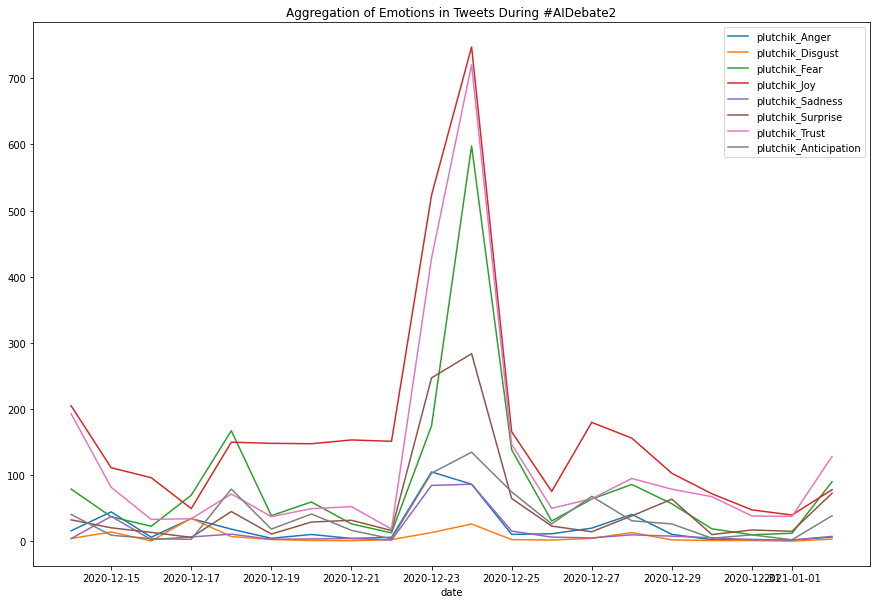

In [20]:
df_temp = df_new.copy()
df_temp[['plutchik_Anger', 'plutchik_Disgust', 'plutchik_Fear', 'plutchik_Joy',
       'plutchik_Sadness', 'plutchik_Surprise', 'plutchik_Trust',
       'plutchik_Anticipation']] = df_temp[['plutchik_Anger', 'plutchik_Disgust', 'plutchik_Fear', 'plutchik_Joy',
       'plutchik_Sadness', 'plutchik_Surprise', 'plutchik_Trust',
       'plutchik_Anticipation']].multiply(df_temp['likes']+1, axis = 'index')
df2 = df_temp[['date','plutchik_Anger', 'plutchik_Disgust', 'plutchik_Fear', 'plutchik_Joy',
       'plutchik_Sadness', 'plutchik_Surprise', 'plutchik_Trust',
       'plutchik_Anticipation']]
df2.set_index('date')

df3 = df2.groupby(df2['date']).sum()

print(df3)


fig = df3.plot(y=['plutchik_Anger', 'plutchik_Disgust', 'plutchik_Fear', 'plutchik_Joy',
       'plutchik_Sadness', 'plutchik_Surprise', 'plutchik_Trust',
       'plutchik_Anticipation'], figsize=(15,10), 
         title='Aggregation of Emotions in Tweets During #AIDebate2').get_figure()
fig.savefig('PLUTCHIK.png')

poms

            poms_Anger  poms_Depression  ...  poms_Tension  poms_Confusion
date                                     ...                              
2020-12-14   46.432900       249.957533  ...     26.885419       34.217376
2020-12-15   66.482658       127.993477  ...     22.842702       55.275999
2020-12-16   14.187149       130.209114  ...     12.887363        9.592426
2020-12-17   13.487548        82.580113  ...      8.895946        9.318365
2020-12-18   94.030626       172.942271  ...    115.664634      112.229341
2020-12-19    6.961106       183.267190  ...     18.666340       14.917760
2020-12-20   33.585796       202.002497  ...     47.946783       32.904036
2020-12-21    9.038784       211.502906  ...     32.822618       10.189568
2020-12-22    5.815274       151.407623  ...     12.999226        6.369046
2020-12-23  123.154344       661.555634  ...    180.510228      465.526802
2020-12-24  271.344561       950.673075  ...    608.939444      374.825208
2020-12-25   28.426978   

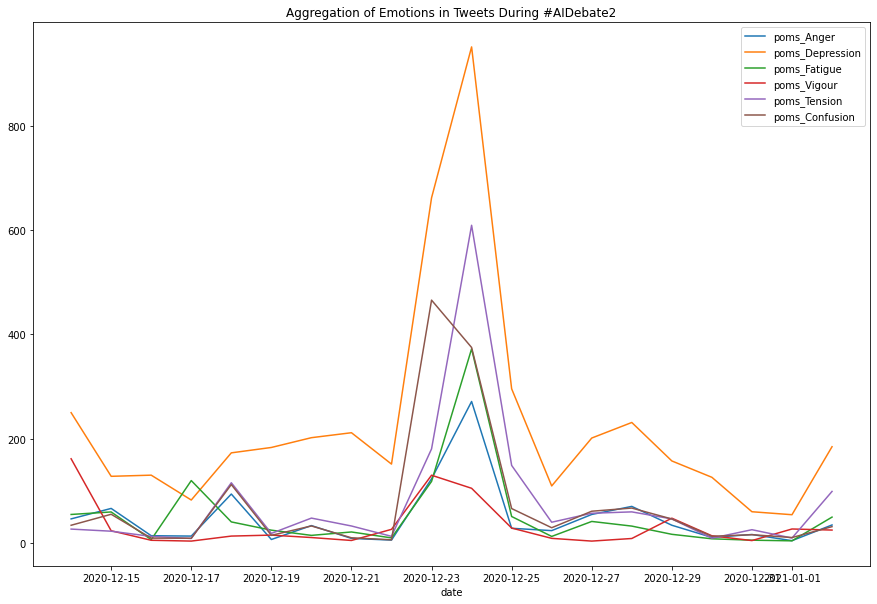

In [21]:
df_temp = df_new.copy()
df_temp[['poms_Anger', 'poms_Depression',
       'poms_Fatigue', 'poms_Vigour', 'poms_Tension', 'poms_Confusion']] = df_temp[['poms_Anger', 'poms_Depression',
       'poms_Fatigue', 'poms_Vigour', 'poms_Tension', 'poms_Confusion']].multiply(df_temp['likes']+1, axis = 'index')
df2 = df_temp[['date','poms_Anger', 'poms_Depression',
       'poms_Fatigue', 'poms_Vigour', 'poms_Tension', 'poms_Confusion']]
df2.set_index('date')

df3 = df2.groupby(df2['date']).sum()

print(df3)


fig = df3.plot(y=['poms_Anger', 'poms_Depression',
       'poms_Fatigue', 'poms_Vigour', 'poms_Tension', 'poms_Confusion'], figsize=(15,10), 
         title='Aggregation of Emotions in Tweets During #AIDebate2').get_figure()
fig.savefig('POMS.png')